<a href="https://colab.research.google.com/github/riverodav/PythonNotebooks/blob/main/07_Proyecto_ReconocedorDeDigitos_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo.png](attachment:logo.png)

#### Módulo 1: Python para la ciencia de datos

# Proyecto: reconocedor de dígitos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos las librerías necesarias
import numpy as np
from skimage import io
import os
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

En este proyecto vas a crear un reconocedor de dígitos. Para ello vas a basarte en un conjunto muy grande de imágenes de dígitos manuscritos. Todas estas imágenes tienen un tamaño de 20 x 20 píxeles. A continnuación te muestro un ejemplo con 10 imágenes de cada dígito.
![numeros.png](attachment:numeros.png)
Para leer cada una de estas imágenes tienes a tu disposición la función leerImagen, que recibe el nombre del archivo que contiene la imagen que quieres leer y devuelve una matriz de numpy. Como las imágenes de dígitos son de 20 x 20 píxeles, la matriz que obtendrás será de 20x20 elementos. Cada uno de estos elementos es un número real entre 0 y 1, que marca todas las tonalidades de gris entre el negro (valor 0.0) y el blanco (valor 1.0).

Para mostrar una imagen almacenada en una matriz de numpy, puedes utilizar la función mostrarImagen, que recibe la matriz de numpy como único argumento.

In [ ]:
#Funciones útiles para leer y mostrar imágenes
def leerImagen(nombre):
    leida = io.imread(nombre, as_gray=True)
    return leida
def mostrarImagen(im):
    return io.imshow(im)

A la hora de crear el reconocedor tienes disponibles muchas imágenes de dígitos en dos carpetas distintas: *imagenes_train* e *imagenes_test*. En cada una de las carpetas, el nombre de los archivos sigue una estructura similar:
* cuatro dígitos que indican el número de archivo dentro de la carpeta
* _ como separación
* un dígito que toma el valor del dígito representado en la imagen
* .png es la extensión de la imagen
Las imágenes almacenadas en la carpeta *imagenes_train* son las que vamos a utilizar como conjunto de entrenamiento. En este conjunto, de cada dato conocemos los valores de sus atributos (cada píxel de la imagen es un atributo) y la clase a la que pertenece el dato. En nuestro problema tenemos 10 clases, que corresponden a los 10 dígitos.

Vas a comenzar preparando los datos de entrenamiento. Tu objetivo es conseguir una matriz que tenga tantas filas como imágenes haya en la carpeta y tantas columnas como píxeles haya en una imagen. Para ello, debes leer todas las imágenes contenidas en la carpeta *imagenes_train*. Cada imagen es un dato (ejemplo) y debes transformarlo para poder almacenarlo en una fila de la matriz. Además, de cada imagen queremos saber la clase a la que pertenece, por lo que debes extraer del nombre del fichero el dígito que representa y almacenarlo en un vector de numpy. Este vector debe contener números enteros.

Por tanto, nuestro conjunto de entrenamiento va a estar formado por una matriz de numpy que guarda todos los atributos de las imágenes (le llamamos *trainData*) y un vector de numpy que almacena las clases de cada imagen (le llamamos *trainClass*).

In [ ]:
#os.chdir("C:\\Users\\alumno\\sibanez\\07-proyecto_recon")
directorio_root = os.getcwd()
entrenamiento = '/content/drive/MyDrive/trabajo (1)/imagenes_train'
test = '/content/drive/MyDrive/trabajo (1)/imagenes_test'

In [ ]:
#funcion para construir la matriz de datos y el array de las clases
#obtenemos los nombres de los archivos de la carpeta
#por cada archivo, lo leemos y su matriz resultante la convertimos a array (aplanando la matriz)
#devolvemos la matriz creada de tantas filas como archivos en la carpeta y 400 elementos cada fila
def construir_matriz(carpeta):
    lista_de_archivos=os.listdir(carpeta)
    os.chdir(carpeta)
    matriz = np.zeros((len(lista_de_archivos),400))
    clases = []
    i=0
    for fichero in lista_de_archivos:
        #print ("fichero: " + fichero)
        imagen = leerImagen(fichero)
        array_imagen = imagen.flatten()
        matriz[i] = array_imagen

        #del nombre del fichero (nnnn_y.jpg) obtenemos la clase, que es la parte que hay entre el '_' y el '.'
        nombre = fichero.split("_")
        #print ("nombre: " + nombre[1])
        clase = nombre[1].split(".")
        #print ("clase: " + clase[0])
        clases.append(int(clase[0]))
        i=i+1


    return matriz, clases

def matriz_to_array(matriz):
    return np.array(matriz)

In [ ]:
os.chdir(directorio_root)
#print (os.getcwd())
#Creación del conjunto de entrenamiento
print ("Conjunto de datos de " + entrenamiento + " creado")
trainData, trainClass = construir_matriz(entrenamiento)

Conjunto de datos de /content/drive/MyDrive/trabajo (1)/imagenes_train creado


Comprueba que tu conjunto de datos es correcto imprimiendo las dimensiones de trainData (3000x400) y trainClass (3000).

In [ ]:
print(trainData.ndim)
print(trainData.shape)
print(len(trainClass))

2
(3000, 400)
3000


Además del conjunto de entrenamiento, necesitamos nuevas imágenes de dígitos para que nuestro reconocedor las clasifique y nos diga a qué dígito corresponde cada una de ellas. A este conjunto de datos sobre el que vamos a probar nuestro reconocedor de dígitos le llamamos conjunto de test. En este caso, con conocer el valor de los atributos de cada imagen (ejemplo) es suficiente, ya que nuestro reconocedor nos indicará la clase a la que pertenece.

Sin embargo, para poder evaluar cómo de bien lo hace el reconocedor, necesitamos saber los dígitos verdaderos que están almacenados en cada imagen. Por ello, el conjunto de test lo vamos a preparar de forma muy similar al conjunto de entrenamiento, generando una matriz de numpy con todas las imágenes que están contenidas en la carpeta *imagenes_test* (le llamamos *testData*) y un vector de numpy con las clases a las que pertenece cada ejemplo (le llamamos *testClass*).

In [ ]:
#Creación del conjunto de test
print ("Conjunto de datos de " + test + " creado")
testData, testClass = construir_matriz(test)

Conjunto de datos de /content/drive/MyDrive/trabajo (1)/imagenes_test creado


Comprueba que tu conjunto de datos es correcto imprimiendo las dimensiones de testData (2000x400) y testClass (2000).

In [ ]:
print(testData.ndim)
print(testData.shape)
print(len(testClass))

2
(2000, 400)
2000


Intro un numero > 0 para ver una imagen de test
2
[[0.05098039 0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039]
 [0.05098039 0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039 0.05098039 0.05098039 0.04705882 0.03529412
  0.04705882 0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039]
 [0.05098039 0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039 0.05098039 0.04705882 0.07843137 0.16470588
  0.0627451  0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039]
 [0.05098039 0.05098039 0.05098039 0.05098039 0.05098039 0.05098039
  0.04705882 0.04705882 0.05098039 0.02352941 0.24705882 0.90588235
  0.36470588 0.03137255 0.05098039 0.05098039 0.05098039 0.05098039
  0.05098039 0.05098039]
 [0.05098039 0.05098039 0.05098039

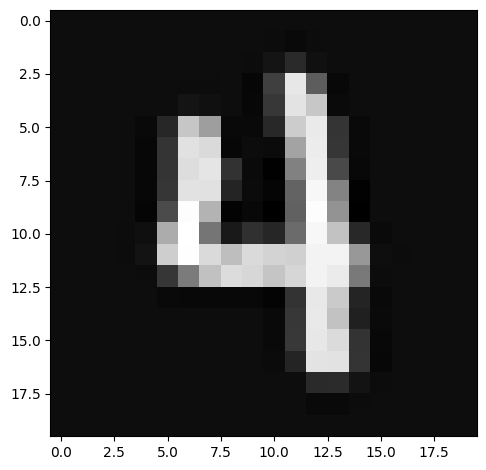

In [ ]:
#vamos a mostrar las imagenes de test hasta que el usuario pulse un 0, de esta forma comprobamos que hemos preparado bien los datos
pulsacion = 1
i=1
while (pulsacion > 0):
    print ("Intro un numero > 0 para ver una imagen de test")    #ojo, el valor de pulsacion no es el valor del digito sino el numero de imagen dentro de la carpeta
    pulsacion = int(input())
    if (pulsacion > 0):
        img_2d = np.reshape(testData[pulsacion], (20, 20))
        print (img_2d)
        img = mostrarImagen(img_2d)
        print (img)
        i = i + 1


Una vez que ya tenemos todos los datos preparados, podemos hacer nuestro reconocedor de dígitos. En este proyecto vamos a utilizar un método muy sencillo, que se basa en buscar una imagen lo más parecida posible dentro del conjunto de entrenamiento y utilizar su clase como clase del nuevo dato a clasificar:
1. Para saber el dígito que representa una imagen del conjunto de test necesitamos sus atributos y los atributos y las clases de todo el conjunto de entrenamimento
2. Medimos la distancia entre dicha imagen de test y cada una de las 3000 imágenes de entrenamiento. Con esto obtenemos un valor numérico que nos dice lo distantes que son dichas imágenes
3. Buscamos el valor de distancia más pequeño. Clasificaremos la imagen de test con el dígito asociado a la imagen de entrenamiento de menor distancia. Es decir, si resulta que la imagen más cercana a la imagen de test es la imagen 1547 (que representa al dígito 5), entonces clasificaremos la imagen de test como dígito 5.

Lo último que nos queda por saber es cómo podemos medir la distancia entre dos imágenes. Como al preparar los conjuntos de entrenamiento y de test hemos transformado cada imagen en un vector de 400 dimensiones, la distancia entre dos imágenes $x,y\in \mathbb{R}^{400}$ puede venir dada por

$$d(x,y) = \sum_{i=1}^{400}(x_i-y_i)^2$$

Crea una función llamada clasificarUnaImagen que recibe la matriz de datos de entrenamiento, el vector con las clases de los ejemplos de entrenamiento y un dato de test, y devuelve la clase a la que pertenece la imagen de test.

In [ ]:
 def clasificarUnaImagen(vectorImagenClasificar, matrizDatosEntrenamiento, vectorClasesEntrenamiento):
    #vectorImagenClasificar--> 400
    #matrizDatosEntrenamiento--> 3000x400
    #vectorClasesEntrenamiento--> 3000
    diferencias_pixel_a_pixel = (matrizDatosEntrenamiento-vectorImagenClasificar)**2
    diferencias_por_fila=np.sum(diferencias_pixel_a_pixel,axis=1)
    fila_mas_parecida=np.argmin(diferencias_por_fila)
    clase=vectorClasesEntrenamiento[fila_mas_parecida]
    return clase


Una vez que ya podemos determiniar el número de una imagen, vas a crear una nueva función que clasifique todas las imágenes del conjunto de test. Para ello crea una nueva función llamada *clasificarMuchasImagenes* que recibe la matriz de datos de entrenamiento, el vector con las clases de los ejemplos de entrenamiento y la matriz de datos de test, y devuelve un vector con las clases a las que pertenecen todas las imágenes de test.

In [ ]:
def clasificarMuchasImagenes(matrizDatosEntrenamiento, vectorClasesEntrenamiento, testData):
    # matrizDatosEntrenamiento --> 3000x400
    # vectorClasesEntrenamiento --> 3000
    # testData --> 2000x400
    clasificacion = []
    for imagenTest in testData:
        cls = clasificarUnaImagen(imagenTest, matrizDatosEntrenamiento, vectorClasesEntrenamiento)
        clasificacion.append(cls)
    return clasificacion


Ahora ya puedes aplicar la función que clasifica todas las imágenes de test sobre tu conjunto de test.

En este paso, mide el tiempo que tarda en ejecutarse la clasificación sobre todas las imágenes. Para ello, puedes usar la función time() de la librería time, que indica el tiempo actual en segundos.

*import time*

*tic=time.time()*

*código*

*toc=time.time()*

*tiempo=toc-tic*

In [ ]:
import time
tic=time.time()

clasificacion = clasificarMuchasImagenes(trainData, trainClass, testData)

toc=time.time()
tiempo=toc-tic

#print(clasificacion)

Una vez que ya has clasificado todos las imágenes del conjunto de test, vas a analizar los resultados obtenidos. En primer lugar, calcula y muestra el porcentaje de imágenes en las que el dígito predicho por el clasificador coincide con el número que realmente representa la imagen.

Nota: recuerda que al principio del proyecto has generado el vector testClass.

In [ ]:
def calcularPorcentajeCoincidencia(clasificacion, testClass):
    coincidencias = sum(np.array(clasificacion) == np.array(testClass))
    porcentaje_coincidencia = (coincidencias / len(testClass)) * 100
    return porcentaje_coincidencia

porcentaje_coincidencia = calcularPorcentajeCoincidencia(clasificacion, testClass)
print(f"Porcentaje de coincidencia: {porcentaje_coincidencia:.2f}%")


Porcentaje de coincidencia: 94.20%


Para completar la información del porcentaje de aciertos, calcula el número de imágenes de cada dígito que no has clasificado correctamente. Esto te dará una visión de los números que son más difíciles de clasificar

In [ ]:
def calcularErroresPorDigito(clasificacion, testClass):
    errores_por_digito = {digit: 0 for digit in set(testClass)}
    for pred, real in zip(clasificacion, testClass):
        if pred != real:
            errores_por_digito[real] += 1
    return errores_por_digito

errores_por_digito = calcularErroresPorDigito(clasificacion, testClass)

for digit, errores in errores_por_digito.items():
    print(f"Número {digit}: {errores} imágenes clasificadas incorrectamente")


Número 0: 3 imágenes clasificadas incorrectamente
Número 1: 2 imágenes clasificadas incorrectamente
Número 2: 16 imágenes clasificadas incorrectamente
Número 3: 15 imágenes clasificadas incorrectamente
Número 4: 15 imágenes clasificadas incorrectamente
Número 5: 18 imágenes clasificadas incorrectamente
Número 6: 6 imágenes clasificadas incorrectamente
Número 7: 4 imágenes clasificadas incorrectamente
Número 8: 23 imágenes clasificadas incorrectamente
Número 9: 14 imágenes clasificadas incorrectamente


### Reducción de tiempo

A pesar de la sencillez de este clasificador, podemos considerar que funciona relativamente bien. Sin embargo, su eficiencia en tiempo no es muy alta.

Una forma de acelerar el proceso de clasificación consiste en reducir el número de atributos de cada dato. En nuestro caso, podemos hacerlo reduciendo el número de píxeles que vamos a considerar de cada imagen. Repite el proceso de clasificación utilizando imágenes con un cuarto de los píxeles originales y con la decimosexta parte. ¿Cambian los porcentajes de acierto en la clasificación?

Nota: para hacer transformar las imágenes a un cuarto de su tamaño original, puedes quedarte con una fila de cada dos y una columna de cada dos. Para reducirlas a una decimosexta parte, puedes quedarte con una fila de cada cuatro y una columna de cada cuatro.

In [ ]:
# IMAGENES A UN CUARTO DEL ORIGINAL
trainData_quarter = trainData.reshape(trainData.shape[0], -1)[:, ::2]
testData_quarter = testData.reshape(testData.shape[0], -1)[:, ::2]

# Clasificación con imágenes redimensionadas
clasificacion_quarter = clasificarMuchasImagenes(trainData_quarter, trainClass, testData_quarter)

# Calcular porcentaje de coincidencia
porcentaje_coincidencia_quarter = calcularPorcentajeCoincidencia(clasificacion_quarter, testClass)
print(f"Porcentaje de coincidencia (un cuarto del tamaño original): {porcentaje_coincidencia_quarter:.2f}%")

Porcentaje de coincidencia (un cuarto del tamaño original): 93.55%


In [ ]:
# IMAGENES A UN DIECISEISAVO DEL ORIGINAL
trainData_sixteenth  = trainData.reshape(trainData.shape[0], -1)[:, ::4]
testData_sixteenth  = testData.reshape(testData.shape[0], -1)[:, ::4]

# Clasificación con imágenes redimensionadas
clasificacion_sixteenth  = clasificarMuchasImagenes(trainData_sixteenth, trainClass, testData_sixteenth)

# Calcular porcentaje de coincidencia
porcentaje_coincidencia_sixteenth  = calcularPorcentajeCoincidencia(clasificacion_sixteenth , testClass)
print(f"Porcentaje de coincidencia (un dieciseisavo del tamaño original): {porcentaje_coincidencia_sixteenth :.2f}%")

Porcentaje de coincidencia (un dieciseisavo del tamaño original): 84.85%


Para cada una de las tres clasificaciones que hemos hecho (datos originales, una cuarta parte de la información y una decimosexta parte de la información) hemos obtenido el porcentaje de aciertos y el número de veces que hemos fallado en la clasificación de cada dígito.

Vamos a centrarnos en esta segunda parte, y vas a mostrar en tres subgráficas distintas (una para cada clasificación) el número de ejemplos de cada dígito que has clasificado erróneamente. Sin embargo, el número de ejemplos de cada dígito en el conjunto de test no es constante, por lo que no es lo mismo fallar 2 ejemplos de un dígito que tenía 10 ejemplos que fallar dos ejemplos de un dígito que tenía 100 ejemplos. Completa la gráfica colocando otras tres subgráficas que muestren el porcentaje de fallos por cada dígito en cada una de las tres clasificaciones.

AttributeError: ignored

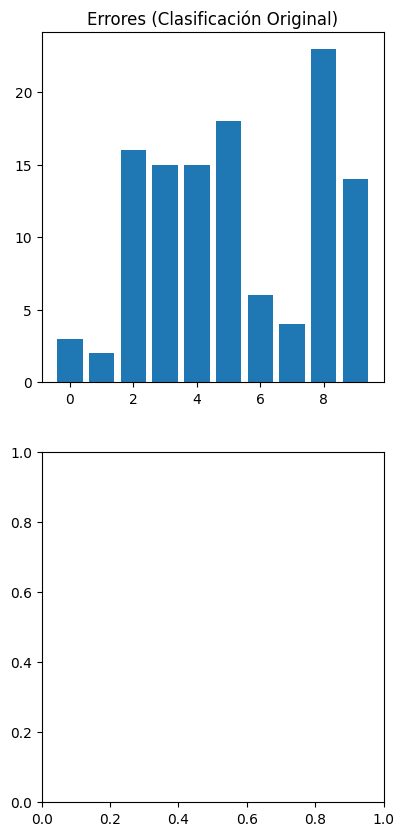

In [ ]:
plt.figure(figsize=(15, 10))

# Subplot para los errores por dígito
plt.subplot(2, 3, 1)
plt.bar(errores_por_digito.keys(), errores_por_digito.values())
plt.title('Errores (Clasificación Original)')

plt.subplot(2, 3, 4)
plt.bar(porcentaje_coincidencia_quarter.keys(), porcentaje_coincidencia_quarter.values())
plt.title('Errores (Un cuarto del tamaño original)')

plt.subplot(2, 3, 6)
plt.bar(porcentaje_coincidencia_sixteenth.keys(), porcentaje_coincidencia_sixteenth.values())
plt.title('Errores (Una decimosexta parte del tamaño original)')

plt.tight_layout()

plt.show()


Hasta ahora, hemos estudiado la precisión del clasificador mediante el porcentaje de aciertos. Sin embargo, resulta muy interesante saber qué digitos estamos confundiendo con qué otros dígitos. Para ello, debes mostrar la matriz de confusión de las tres clasificaciones que has hecho: datos originales, datos reducidos a una cuarta parte, datos reducidos a una decimosexta parte.

In [ ]:
from sklearn.metrics import confusion_matrix



Ya hemos comentado que el tiempo de ejecución de esta clasificación puede ser un problema cuando tenemos en cuenta todos los píxeles de cada una de las imágenes. Sin embargo, también hemos visto que el porcentaje de acierto disminuye conforme reducimos el número de píxeles a estudiar. En concreto, hemos comparado las clasificaciones con el total de píxeles de una imagen, un cuarto y una decimosexta parte.

Calcula los porcentajes de acierto y el tiempo de ejecución de todas las clasificaciones existentes seleccionando:
* todas las filas y columnas existentes
* una de cada dos filas y una de cada dos columnas
* una de cada tres filas y una de cada tres columnas
* una de cada cuatro filas y una de cada cuatro columnas
* ...
* una de cada diez filas y una de cada diez columnas

Muestra en una gráfica cómo disminuye la precisión de la clasificación (porcentaje de acierto) conforme disminuye el tiempo de ejecución (para cada tamaño de imagen pinta tanto el porcentaje de acierto como el tiempo necesario).

Nota: este proceso puede llevar más tiempo del habitual. Para intentar mejorarlo un poco, procura que tu método de clasificación sea lo más eficiente posible, con el menor número de bucles (la función clasificarUnaImagen se puede hacer sin bucles).

Por último, vamos a analizar qué ocurre si tratamos de reducir las dimensiones del problema (número de características que representa a cada imagen) utilizando PCA en lugar de seleccionar algunas características originales.

Para ello, vamos a probar a clasificar nuestros dígitos seleccionando un número variable de las características más relevantes según PCA. En cada una de las clasificaciones queremos obtener el porcentaje de acierto. Ten en cuenta el tiempo de ejecucuón a la hora de decidir cuántas clasificaciones vas a ejecutar. La gráfica debe mostrar el dominio completo, entre 1 y 400 características.

Muestra en una gráfica cómo varía el porcentaje de acierto de los datos de test según reducimos el número de características de cada ejemplo.

In [ ]:
from sklearn import decomposition



Finalizamos el ejercicio mostrando en otra gráfica la diferencia del porcentaje de ejemplos bien clasificados cuando reducimos las características de cada ejemplo seleccionando algunas de ellas equidistantes frente a seleccionarlas sobre PCA. Se debe mostrar, para cada tamaño de características seleccionadas, el porcentaje de ejemplos bien clasificados si las características son píxeles equidistantes y si las características han sido seleccionadas como las más representativas del PCA.